In [10]:
from mikeio import Dfsu,Dfs0,Mesh
import pandas as pd
import geopandas as gpd

In [19]:
# 设置参数
filename = r"2%-be.dfsu"
item = 'Current speed'
setp = -1

In [40]:
# 实例化dfsu文件
df = Dfsu(filename)
mesh = Mesh(filename)

<AxesSubplot:>

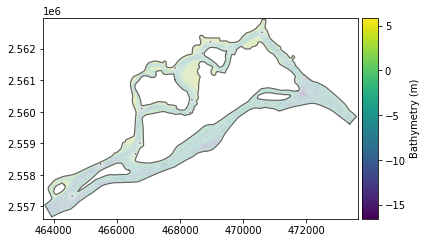

In [41]:
mesh.plot()

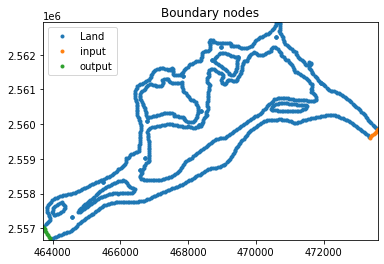

In [46]:
mesh.plot_boundary_nodes(boundary_names=['Land','input', 'output'])

In [47]:
mp = mesh.to_shapely()

In [64]:
mp.type

'MultiPolygon'

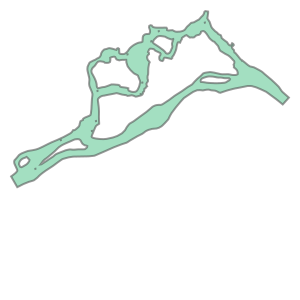

In [49]:
domain = mp.buffer(0)
domain

In [72]:
dir(domain)

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_exterior',
 '_geom',
 '_get_coords',
 '_interiors',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'exterior',
 'from_bounds

In [69]:
type(domain)
res = gpd.GeoSeries([domain])
res.to_file('ccvb1.shp')

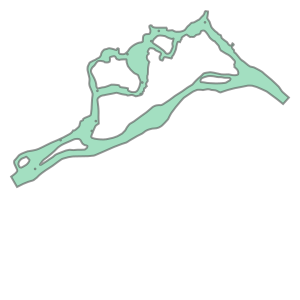

In [60]:
domain1 = domain.buffer(-10)
domain1

In [33]:
# 设置数据
item_data = data[item][setp]
item_dataframe = pd.DataFrame({'speed': item_data})

In [34]:
shp = df.to_shapely()
poly_list = [e for e in shp]

In [35]:
# 转换为地理数据格式
gdf = gpd.GeoDataFrame(item_dataframe, geometry=poly_list)

In [36]:
# 导出shp
gdf.to_file("xxx.shp")